<a href="https://colab.research.google.com/github/sarathkumar271002/Complete_ML_Project-Diabetes_prediction_web_app/blob/main/Diabetes_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pprint import pprint
import pandas as pd
import numpy as np

#Statistic
from scipy import stats

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans

# Saving trained models for future deployment.
import pickle

from sklearn.metrics import confusion_matrix

# ***EDA***

# **Data loading**

In [103]:
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')

# **Data summary**

In [ ]:
df.shape

(100000, 9)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [ ]:
for col in df.columns:
  print(f'{col} : {df[col].unique()}')
  print("---------------------------")

gender : ['Female' 'Male' 'Other']
---------------------------
age : [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
---------------------------
hypertension : [0 1]
---------------------------
heart_disease : [1 0]
---------------------------
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
---------------------------
bmi : [25.19 27.32 23.45 ... 59.42 44.39 60.52]
---------------------------
HbA1c_leve

# **Identifing missing values**

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


# **Identifing duplicate values**

In [ ]:
df.duplicated().sum()

np.int64(3854)

# **Univariate and Bivariate Analysis**

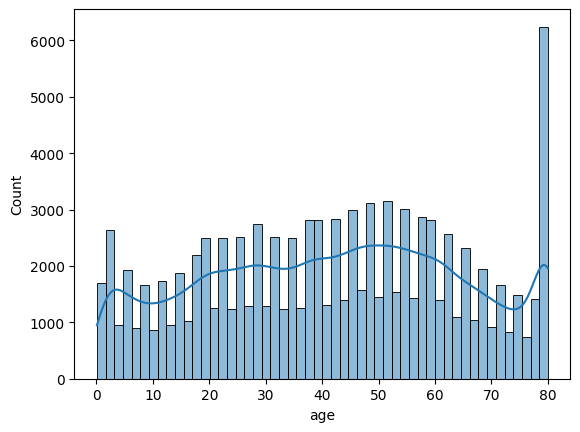

In [ ]:
# Univariate Analysis
# Histogram (to see distribution)
sns.histplot(df['age'], kde=True)
plt.show()

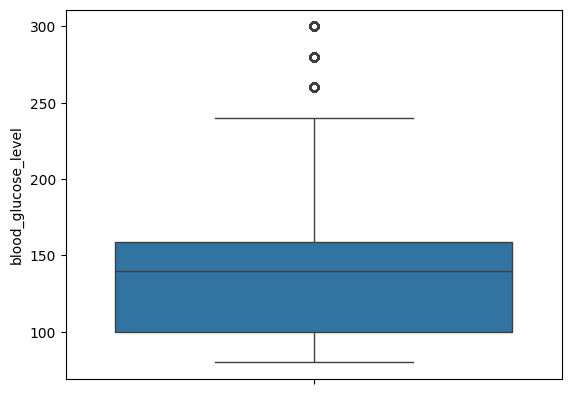

In [ ]:
#Box plot (to detect outliers)
sns.boxplot(df['blood_glucose_level'])
plt.show()

# **Outliers Detection**

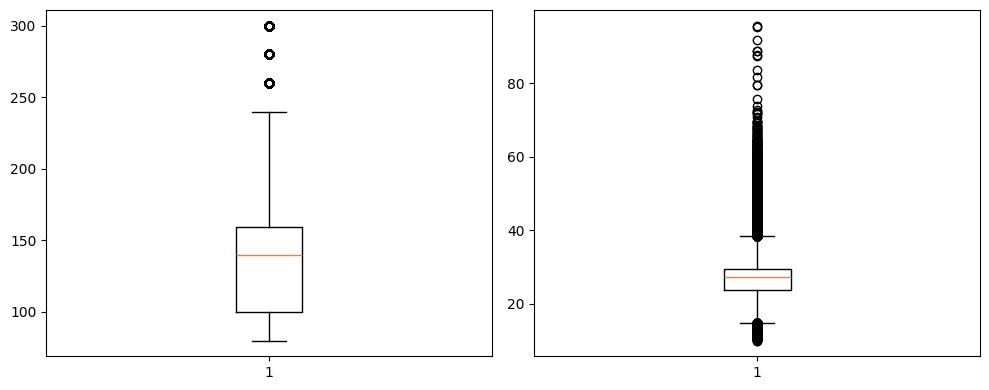

In [ ]:
# Using Box plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].boxplot(df['blood_glucose_level'])
axes[1].boxplot(df['bmi'])

plt.tight_layout()
plt.show()

In [ ]:
# Using IQL (Interquartilr Range Method)
Q1 = df['blood_glucose_level'].quantile(0.25)
Q3 = df['blood_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['blood_glucose_level'] < lower_bound) | (df['blood_glucose_level'] > upper_bound)]
print(outliers)

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]
print(outliers)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
38       Male  50.0             1              0         current  27.32   
94     Female  60.0             0              0           never  27.32   
104    Female  80.0             1              0           never  27.32   
125    Female  77.0             0              0           never  31.70   
142    Female  80.0             0              0          former  21.97   
...       ...   ...           ...            ...             ...    ...   
99763  Female  50.0             0              0           never  35.91   
99826    Male  63.0             0              1         No Info  27.32   
99867    Male  64.0             1              0          former  33.12   
99938    Male  55.0             0              1          former  30.42   
99957  Female  61.0             0              0         No Info  34.45   

       HbA1c_level  blood_glucose_level  diabetes  
38             5.7                  260        

In [ ]:
# Using Z-score (Standard Score Method)
from scipy.stats import zscore
z_scores = zscore(df['blood_glucose_level'])
outliers = df[np.abs(z_scores) > 3]
print(outliers)

z_scores = zscore(df['bmi'])
outliers = df[np.abs(z_scores) > 3]
print(outliers)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
94     Female  60.0             0              0           never  27.32   
104    Female  80.0             1              0           never  27.32   
125    Female  77.0             0              0           never  31.70   
142    Female  80.0             0              0          former  21.97   
146      Male  53.0             0              0         current  30.80   
...       ...   ...           ...            ...             ...    ...   
99763  Female  50.0             0              0           never  35.91   
99826    Male  63.0             0              1         No Info  27.32   
99867    Male  64.0             1              0          former  33.12   
99938    Male  55.0             0              1          former  30.42   
99957  Female  61.0             0              0         No Info  34.45   

       HbA1c_level  blood_glucose_level  diabetes  
94             7.5                  300        

# **Correlation**

In [ ]:
c = df.select_dtypes(exclude='object').corr()
c

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


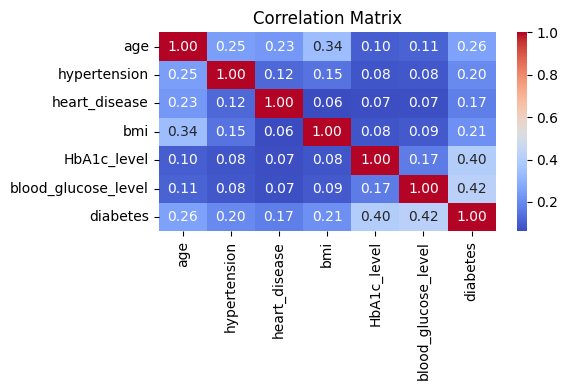

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(c, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# **Visualization**

<Figure size 800x600 with 0 Axes>

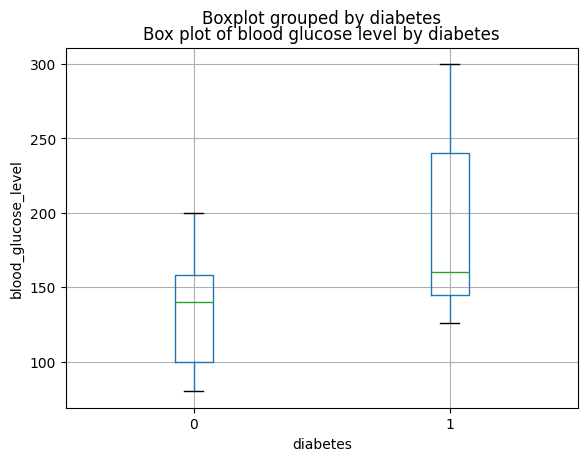

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust size if needed
df.boxplot(column='blood_glucose_level', by='diabetes')
plt.xlabel('diabetes')
plt.ylabel('blood_glucose_level')
plt.title('Box plot of blood glucose level by diabetes')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

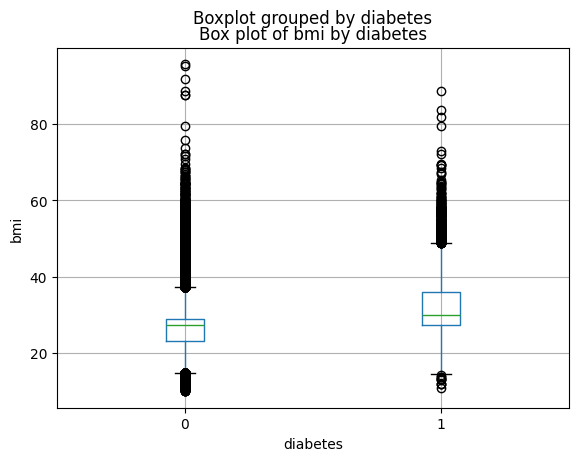

In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot(column='bmi', by='diabetes')
plt.xlabel('diabetes')
plt.ylabel('bmi')
plt.title('Box plot of bmi by diabetes')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

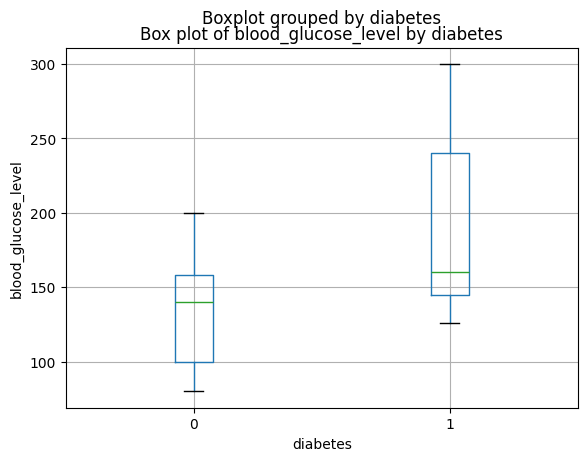

In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot(column='blood_glucose_level', by='diabetes')
plt.xlabel('diabetes')
plt.ylabel('blood_glucose_level')
plt.title('Box plot of blood_glucose_level by diabetes')
plt.grid(True)
plt.show()

# ***Data preprocessing***

In [104]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **Handling duplicate values**

In [ ]:
df.duplicated().sum()

np.int64(3854)

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

# **Encoding**

In [81]:
# import pickle
# from sklearn.preprocessing import OrdinalEncoder

# # Separate encoders for each categorical feature
# gender_encoder = OrdinalEncoder()
# smoking_encoder = OrdinalEncoder()

# # 1️⃣ Fit encoders on original string data
# gender_encoder.fit(df[['gender']])
# smoking_encoder.fit(df[['smoking_history']])

# # 2️⃣ Save encoders (still holding string categories)
# with open('gender_encoder.pkl', 'wb') as file:
#     pickle.dump(gender_encoder, file)

# with open('smoking_encoder.pkl', 'wb') as file:
#     pickle.dump(smoking_encoder, file)

# print("✅ Encoders saved as 'gender_encoder.pkl' and 'smoking_encoder.pkl'")

# # 3️⃣ Transform for training
# df['gender'] = gender_encoder.transform(df[['gender']])
# df['smoking_history'] = smoking_encoder.transform(df[['smoking_history']])


✅ Encoders saved as 'gender_encoder.pkl' and 'smoking_encoder.pkl'


In [105]:
import pickle
from sklearn.preprocessing import OrdinalEncoder

# Keep original string values in memory
gender_encoder = OrdinalEncoder()
smoking_encoder = OrdinalEncoder()

# 1️⃣ Fit on string data only
gender_encoder.fit(df[['gender']])
smoking_encoder.fit(df[['smoking_history']])

# 2️⃣ Save encoders BEFORE transformation
with open('gender_encoder.pkl', 'wb') as f:
    pickle.dump(gender_encoder, f)

with open('smoking_encoder.pkl', 'wb') as f:
    pickle.dump(smoking_encoder, f)

print("✅ Encoders saved with original string categories.")

# 3️⃣ Transform data for training
df['gender'] = gender_encoder.transform(df[['gender']])
df['smoking_history'] = smoking_encoder.transform(df[['smoking_history']])


✅ Encoders saved with original string categories.


# ***Machine Learning***

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

In [106]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,4.0,25.19,6.6,140,0
1,0.0,54.0,0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0,0,4.0,27.32,5.7,158,0
3,0.0,36.0,0,0,1.0,23.45,5.0,155,0
4,1.0,76.0,1,1,1.0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0,0,0.0,27.32,6.2,90,0
99996,0.0,2.0,0,0,0.0,17.37,6.5,100,0
99997,1.0,66.0,0,0,3.0,27.83,5.7,155,0
99998,0.0,24.0,0,0,4.0,35.42,4.0,100,0


In [96]:
from sklearn.model_selection import train_test_split
x=df.drop("diabetes",axis=1)
y=df["diabetes"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [97]:
from sklearn.metrics import accuracy_score

class Classification_models:
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def decisiontree(self):
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier().fit(self.x_train, self.y_train)
        y_train_pred = model.predict(self.x_train)
        y_test_pred = model.predict(self.x_test)
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        print('Decision Tree Classifier train accuracy score: ', train_accuracy)
        print('Decision Tree Classifier test accuracy score: ', test_accuracy)
        return train_accuracy, test_accuracy

    def random_forest_classifier(self):
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier().fit(self.x_train, self.y_train)
        y_train_pred = model.predict(self.x_train)
        y_test_pred = model.predict(self.x_test)
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        print('Random Forest Classifier train accuracy score: ', train_accuracy)
        print('Random Forest Classifier test accuracy score: ', test_accuracy)
        return train_accuracy, test_accuracy

    def gradient_boosting(self):
        from sklearn.ensemble import GradientBoostingClassifier
        model = GradientBoostingClassifier().fit(self.x_train, self.y_train)
        y_train_pred = model.predict(self.x_train)
        y_test_pred = model.predict(self.x_test)
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        print("Gradient Boosting Classifier train accuracy score: ", train_accuracy)
        print("Gradient Boosting Classifier test accuracy score: ", test_accuracy)
        return train_accuracy, test_accuracy

    def adaboost(self):
        from sklearn.ensemble import AdaBoostClassifier
        model = AdaBoostClassifier().fit(self.x_train, self.y_train)
        y_train_pred = model.predict(self.x_train)
        y_test_pred = model.predict(self.x_test)
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        print("AdaBoost Classifier train accuracy score: ", train_accuracy)
        print("AdaBoost Classifier test accuracy score: ", test_accuracy)
        return train_accuracy, test_accuracy

    def extra_trees_classifier(self):
        from sklearn.ensemble import ExtraTreesClassifier
        model = ExtraTreesClassifier().fit(self.x_train, self.y_train)
        y_train_pred = model.predict(self.x_train)
        y_test_pred = model.predict(self.x_test)
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        print("Extra Trees Classifier train accuracy score: ", train_accuracy)
        print("Extra Trees Classifier test accuracy score: ", test_accuracy)
        return train_accuracy, test_accuracy

# Example usage:
# Assuming x_train, x_test, y_train, y_test are already defined

model = Classification_models(x_train, x_test, y_train, y_test)

accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.random_forest_classifier(),
    'GradientBoosting': model.gradient_boosting(),
    'AdaBoost': model.adaboost(),
    'ExtraTreesClassifier': model.extra_trees_classifier()
}

for classifier, (train_score, test_score) in accuracy_scores.items():
    print(f"\n{classifier} train accuracy score: {train_score:.4f}")
    print(f"{classifier} test accuracy score: {test_score:.4f}")


Decision Tree Classifier train accuracy score:  0.9991563717049381
Decision Tree Classifier test accuracy score:  0.9482059282371295
Random Forest Classifier train accuracy score:  0.9991332586009638
Random Forest Classifier test accuracy score:  0.9679667186687467
Gradient Boosting Classifier train accuracy score:  0.9714322034877674
Gradient Boosting Classifier test accuracy score:  0.9706708268330734
AdaBoost Classifier train accuracy score:  0.9707388103685385
AdaBoost Classifier test accuracy score:  0.9709828393135725
Extra Trees Classifier train accuracy score:  0.9991563717049381
Extra Trees Classifier test accuracy score:  0.9661986479459178

DecisionTree train accuracy score: 0.9992
DecisionTree test accuracy score: 0.9482

RandomForest train accuracy score: 0.9991
RandomForest test accuracy score: 0.9680

GradientBoosting train accuracy score: 0.9714
GradientBoosting test accuracy score: 0.9707

AdaBoost train accuracy score: 0.9707
AdaBoost test accuracy score: 0.9710

Extr

In [ ]:
import sklearn

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Gradient Boosting model (no need for base_estimator like AdaBoost)
gb = GradientBoostingClassifier(random_state=42)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 5, 10],
}

# Grid search
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit on training data
grid_search.fit(x_train, y_train)

# Best model after tuning
best_gb = grid_search.best_estimator_

# Predict and evaluate
train_pred = best_gb.predict(x_train)
test_pred = best_gb.predict(x_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Output
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy after tuning:", train_acc)
print("Test Accuracy after tuning:", test_acc)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'learning_rate': 1.0, 'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train Accuracy after tuning: 0.9712010724480244
Test Accuracy after tuning: 0.9718148725949038


In [98]:
# Save the best model as a pickle file
with open("diabetes_gb_model.pkl", "wb") as f:
    pickle.dump(best_gb, f)

print("✅ Model saved as diabetes_gb_model.pkl")

✅ Model saved as diabetes_gb_model.pkl


In [72]:
# predict for one row in trained model
# Load the trained model
with open("diabetes_gb_model.pkl", "rb") as f:
    model = pickle.load(f)

# Example: One row of data (replace with your real values)
# Order of features must match the training data
row_data = [[0.0, 80.0, 0, 1, 4.0, 25.19, 6.6, 330]]

# Predict
prediction = model.predict(row_data)
print("Prediction:", prediction[0])  # 0 = No Diabetes, 1 = Diabetes

Prediction: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


# Model Evalutaion

✅ Accuracy (Train): 0.971247298655973
✅ Accuracy (Test): 0.9713988559542381
📌 Precision: 0.9856115107913669
📌 Recall: 0.6723926380368098
📌 F1 Score: 0.799416484318016

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8800
           1       0.99      0.67      0.80       815

    accuracy                           0.97      9615
   macro avg       0.98      0.84      0.89      9615
weighted avg       0.97      0.97      0.97      9615



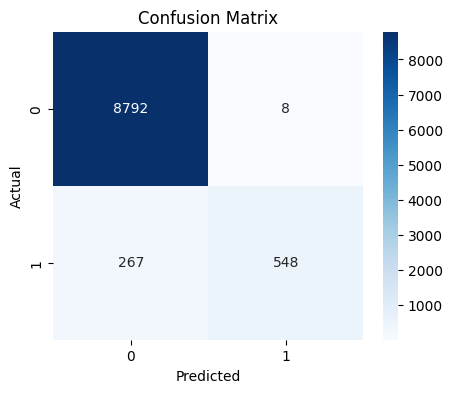

In [99]:
# Predictions
y_train_pred = best_gb.predict(x_train)
y_test_pred = best_gb.predict(x_test)

# 1. Basic Scores
print("✅ Accuracy (Train):", accuracy_score(y_train, y_train_pred))
print("✅ Accuracy (Test):", accuracy_score(y_test, y_test_pred))

print("📌 Precision:", precision_score(y_test, y_test_pred))
print("📌 Recall:", recall_score(y_test, y_test_pred))
print("📌 F1 Score:", f1_score(y_test, y_test_pred))

# 2. Classification Report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_test_pred))

# 3. Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Streamlit Part**

In [74]:
!pip install streamlit pyngrok -q

In [132]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
import base64

# ------------------ PAGE CONFIG ------------------
st.set_page_config(page_title="Diabetes Prediction", layout="centered", page_icon="🩺")

# ------------------ CUSTOM BACKGROUND IMAGE ------------------
def add_bg_from_local(image_file):
    with open(image_file, "rb") as f:
        img_data = f.read()
    encoded_img = base64.b64encode(img_data).decode()
    st.markdown(
        f"""
        <style>
        .stApp {{
            background-image: url("data:image/png;base64,{encoded_img}");
            background-size: cover;
            background-position: center;
            background-repeat: no-repeat;
        }}
        </style>
        """,
        unsafe_allow_html=True
    )

add_bg_from_local("diabetes.jpeg")  # Background image

# ------------------ TITLE ------------------
st.markdown(
    "<h1 style='text-align: center; color: white;'>🩺 Diabetes Prediction Web App</h1>",
    unsafe_allow_html=True
)

# ------------------ LOAD MODEL & ENCODERS ------------------
with open("diabetes_gb_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("gender_encoder.pkl", "rb") as f:
    gender_encoder = pickle.load(f)

with open("smoking_encoder.pkl", "rb") as f:
    smoking_encoder = pickle.load(f)

# ------------------ CUSTOM STYLES ------------------
st.markdown(
    """
    <style>
    /* ----- Bold & Black Labels ----- */
    .stSelectbox label, .stNumberInput label {
        color: black !important;
        font-weight: bold !important;
        font-size: 16px !important;
    }

    /* ----- Selectbox Styling ----- */
    div[data-baseweb="select"] > div {
        background-color: white !important;
        color: black !important;
        border: 2px solid #007acc !important;
        border-radius: 5px !important;
    }

    /* Dropdown text color */
    div[data-baseweb="select"] span {
        color: black !important;
    }

    /* ----- Number Input Styling ----- */
    input[type=number] {
        background-color: white !important;
        color: black !important;
        border: 2px solid #007acc !important;
        border-radius: 5px !important;
    }

    /* Title styling */
    h1 {
        color: black !important;
        font-weight: bold !important;
        text-align: center !important;
    }

    /* ----- Prediction Output Styling ----- */
    .stSuccess {
        background-color: #8cd98c !important; /* Darker green */
        color: black !important;
        font-weight: bold !important;
        font-size: 20px !important;
        border: 2px solid black !important;
        border-radius: 8px !important;
        padding: 15px !important;
    }
    .stError {
        background-color: #ff6666 !important; /* Darker red */
        color: black !important;
        font-weight: bold !important;
        font-size: 20px !important;
        border: 2px solid black !important;
        border-radius: 8px !important;
        padding: 15px !important;
    }
    </style>
    """,
    unsafe_allow_html=True
)

# ------------------ INPUT FIELDS ------------------
gender_input = st.selectbox("Select Gender", list(gender_encoder.categories_[0]))
age = st.number_input("Age", min_value=1, max_value=120, step=1)
hypertension = st.selectbox("Hypertension", ["No", "Yes"])
heart_disease = st.selectbox("Heart Disease", ["No", "Yes"])
smoking_input = st.selectbox("Smoking History", list(smoking_encoder.categories_[0]))
bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, step=0.1)
hba1c = st.number_input("HbA1c Level", min_value=0.0, max_value=20.0, step=0.1)
blood_glucose = st.number_input("Blood Glucose Level", min_value=0, max_value=400, step=1)

# ------------------ PREDICTION ------------------
if st.button("Check Diabetes"):
    gender_encoded = gender_encoder.transform([[gender_input]])[0][0]
    smoking_encoded = smoking_encoder.transform([[smoking_input]])[0][0]
    hypertension_val = 1 if hypertension == "Yes" else 0
    heart_disease_val = 1 if heart_disease == "Yes" else 0

    data = np.array([[gender_encoded, age, hypertension_val, heart_disease_val,
                      smoking_encoded, bmi, hba1c, blood_glucose]])
    prediction = model.predict(data)[0]

    if prediction == 1:
        # st.error("⚠️ High likelihood of diabetes")
        st.markdown(
            """
            <div style='background-color:#ff6666; padding:15px; border-radius:8px;
                        border:2px solid black; color:black; font-weight:bold;
                        font-size:20px;'>
                ⚠️ High likelihood of diabetes
            </div>
            """, unsafe_allow_html=True
        )
    else:
        # st.success("✅ Low likelihood of diabetes")
        st.markdown(
            """
            <div style='background-color:#8cd98c; padding:15px; border-radius:8px;
                        border:2px solid black; color:black; font-weight:bold;
                        font-size:20px;'>
                ✅ Low likelihood of diabetes
            </div>
            """, unsafe_allow_html=True
        )

Overwriting app.py


In [92]:
!pip install pyngrok -q
from pyngrok import ngrok

# Add your token here
!ngrok config add-authtoken 30y06aS09CrHLdHMts1Ip0TG3ro_7vpAv7SSNQ1h5HJdfHu3K

# Start streamlit app
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# Create public link
public_url = ngrok.connect(8501)
print("Public URL:", public_url)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public URL: NgrokTunnel: "https://02c4d63ada5e.ngrok-free.app" -> "http://localhost:8501"
